<a href="https://colab.research.google.com/github/Mithun120/Booking-app/blob/main/8sempaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost==1.5

#Importing dataset

df= pd.read_csv('https://raw.githubusercontent.com/narendranath-r/Patient-Satisfaction/main/datasetsatisfaction%20dataset.csv')

df

# 1:very unsatisfied, 2: no satisfied, 3:neutral, 4: satisfied, 5:very satisfied
# 1: No, 2:partly, 3:Yes For satisfaction

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


,Satisfaction in overall,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,2.0,3.0,1.0,5.0,4.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,5.0,5.0,5.0,5.0
1,2.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,3.0,1.0,4.0,3.0,5.0,3.0,4.0,4.0,4.0
2,2.0,3.0,2.0,4.0,3.0,4.0,1.0,5.0,3.0,1.0,4.0,3.0,4.0,4.0,2.0,4.0,2.0
3,2.0,5.0,3.0,2.0,4.0,4.0,1.0,1.0,2.0,1.0,3.0,5.0,3.0,4.0,2.0,3.0,3.0
4,2.0,5.0,2.0,3.0,5.0,4.0,3.0,3.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1.0,3.0,2.0,1.0,2.0,5.0,5.0,2.0,5.0,5.0,2.0,5.0,5.0,2.0,2.0,4.0,3.0
449,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,1.0,5.0,4.0,1.0,4.0,4.0,1.0,1.0,5.0
450,1.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
451,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
df.columns

Index(['Satisfaction in overall', 'Check up appointment', 'Time waiting',
       'Admin procedures', 'Hygiene and cleaning', 'Time of appointment',
       'Quality/experience dr.', 'Specialists avaliable',
       'Communication with dr', 'Exact diagnosis', 'Modern equipment',
       'friendly health care workers', 'lab services', 'avaliablity of drugs',
       'waiting rooms', 'hospital rooms quality',
       'parking, playing rooms, caffes'],
      dtype='object')

In [ ]:
#Converting column names into snake case for access
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns

Index(['satisfaction_in_overall', 'check_up_appointment', 'time_waiting',
       'admin_procedures', 'hygiene_and_cleaning', 'time_of_appointment',
       'quality/experience_dr.', 'specialists_avaliable',
       'communication_with_dr', 'exact_diagnosis', 'modern_equipment',
       'friendly_health_care_workers', 'lab_services', 'avaliablity_of_drugs',
       'waiting_rooms', 'hospital_rooms_quality',
       'parking,_playing_rooms,_caffes'],
      dtype='object')

In [ ]:
#dataset size
df.shape


(453, 17)

In [ ]:
#Checking empty cells
df.isnull().sum()


satisfaction_in_overall           1
check_up_appointment              1
time_waiting                      1
admin_procedures                  1
hygiene_and_cleaning              1
time_of_appointment               1
quality/experience_dr.            1
specialists_avaliable             1
communication_with_dr             1
exact_diagnosis                   1
modern_equipment                  1
friendly_health_care_workers      1
lab_services                      1
avaliablity_of_drugs              1
waiting_rooms                     1
hospital_rooms_quality            1
parking,_playing_rooms,_caffes    1
dtype: int64

In [ ]:
#To drop empty rows
df.dropna(axis=0,how='all', inplace=True )

In [ ]:
df.isna().sum()

satisfaction_in_overall           0
check_up_appointment              0
time_waiting                      0
admin_procedures                  0
hygiene_and_cleaning              0
time_of_appointment               0
quality/experience_dr.            0
specialists_avaliable             0
communication_with_dr             0
exact_diagnosis                   0
modern_equipment                  0
friendly_health_care_workers      0
lab_services                      0
avaliablity_of_drugs              0
waiting_rooms                     0
hospital_rooms_quality            0
parking,_playing_rooms,_caffes    0
dtype: int64

In [ ]:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)

In [ ]:
# get the summary
df1 = df.describe()

# display it
df1

,satisfaction_in_overall,check_up_appointment,time_waiting,admin_procedures,hygiene_and_cleaning,time_of_appointment,quality/experience_dr.,specialists_avaliable,communication_with_dr,exact_diagnosis,modern_equipment,friendly_health_care_workers,lab_services,avaliablity_of_drugs,waiting_rooms,hospital_rooms_quality,"parking,_playing_rooms,_caffes"
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.486726,2.896018,2.962389,2.938053,2.712389,2.964602,2.964602,2.951327,2.869469,2.966814,2.756637,2.769912,3.015487,2.962389,2.876106,2.913717,3.013274
std,0.538785,1.261851,1.146053,1.149825,1.161667,1.221966,1.231005,1.140787,1.276861,1.215661,1.141079,1.238759,1.264290,1.215532,1.103373,1.127793,1.128074
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#Counts the different values in column satisfaction_in_overall
size=df['satisfaction_in_overall'].value_counts()
size

1.0    241
2.0    202
3.0      9
Name: satisfaction_in_overall, dtype: int64

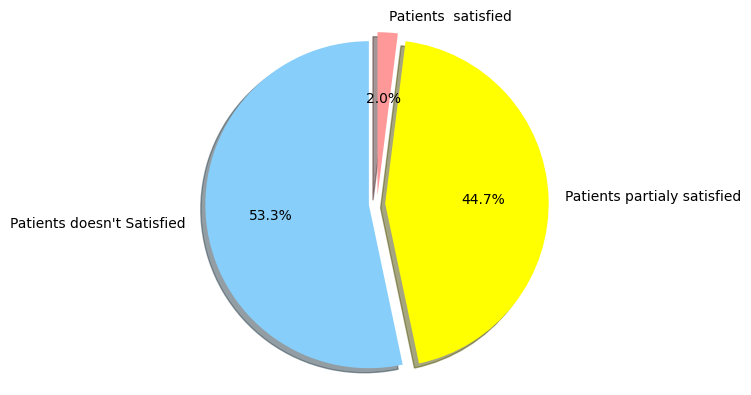

In [ ]:
labels = 'Patients doesn\'t Satisfied ','Patients partialy satisfied', 'Patients  satisfied'

explode = (0.05, 0.05, 0.05)
colors=['lightskyblue','yellow','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: xlabel='satisfaction_in_overall', ylabel='Count'>

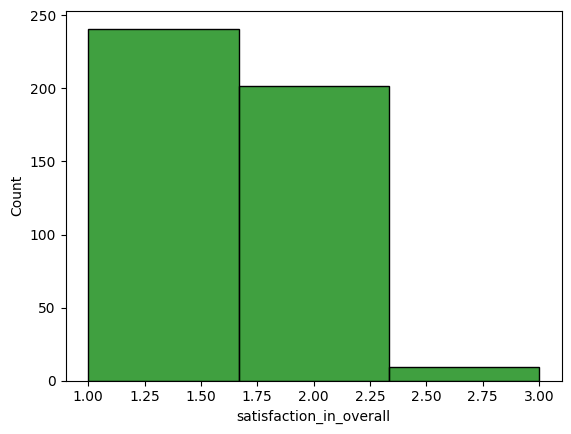

In [ ]:
sns.histplot(data=df, x="satisfaction_in_overall",bins = 3,color="green")

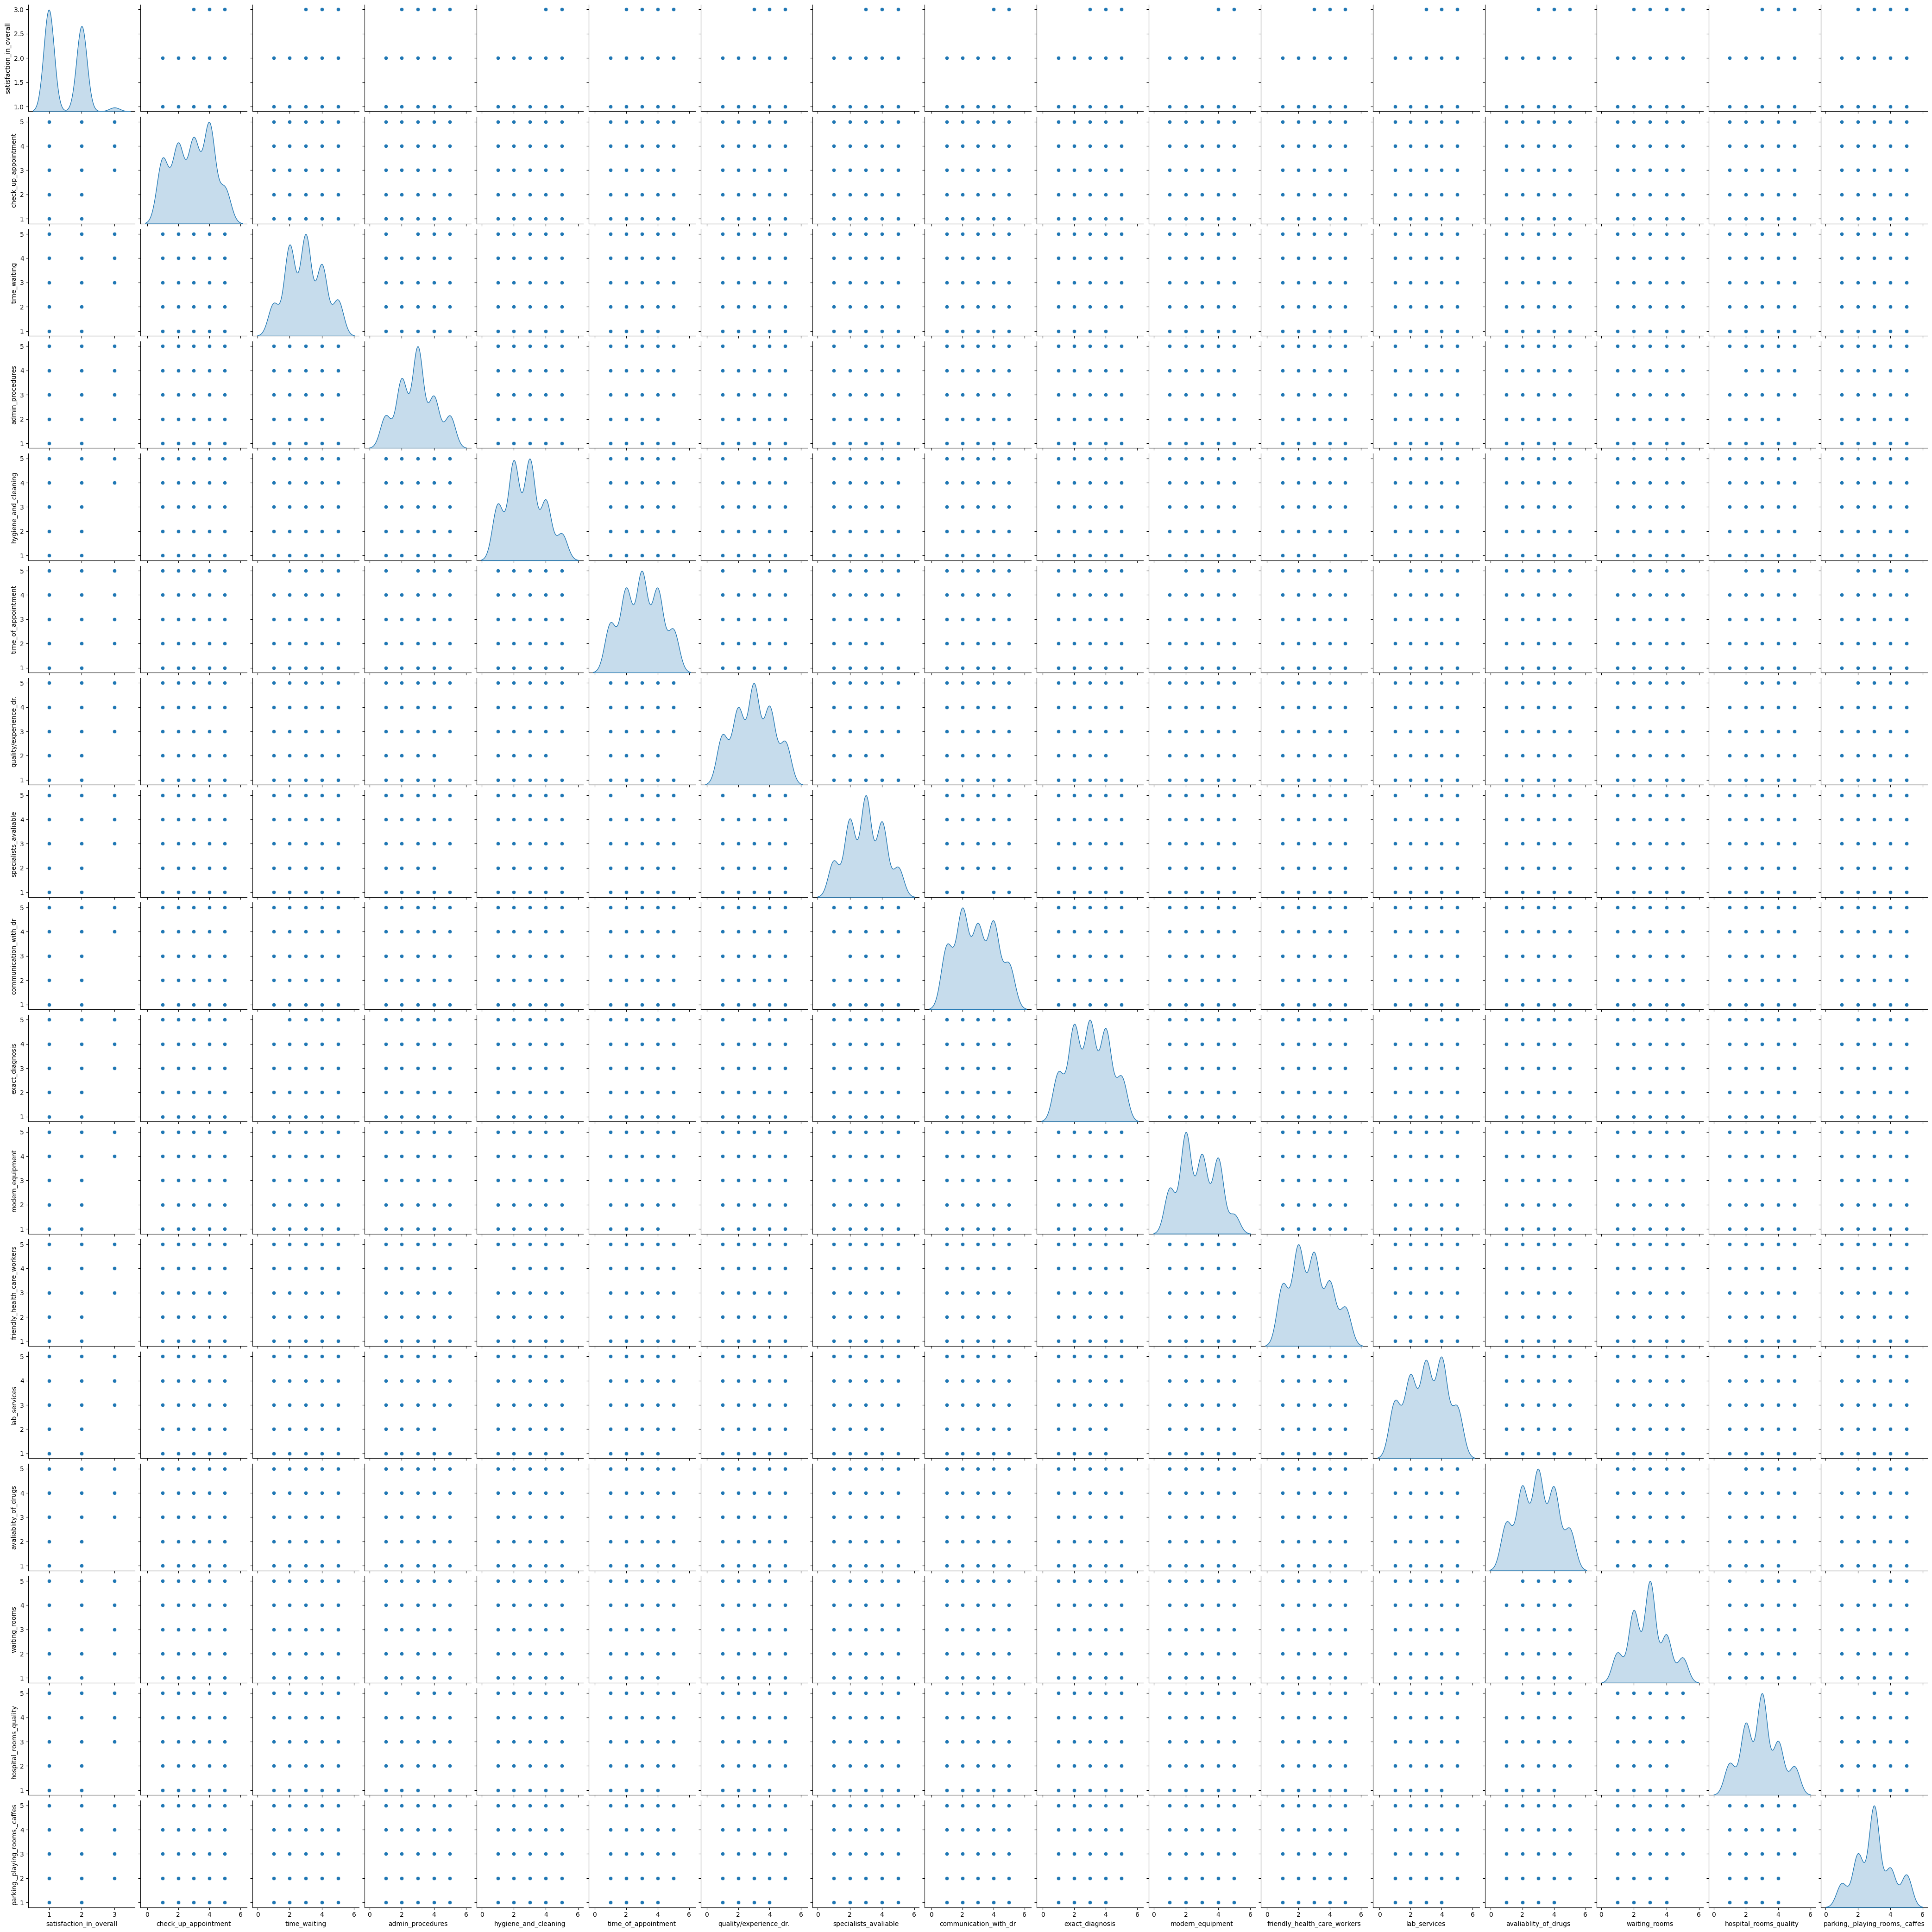

In [ ]:
sns.pairplot(data=df, diag_kind='kde')

In [ ]:
df["check_up_appointment"].unique()

array([3., 4., 5., 2., 1.])

In [ ]:
perc = (lambda col: col/col.sum())
index = [1,2,3]

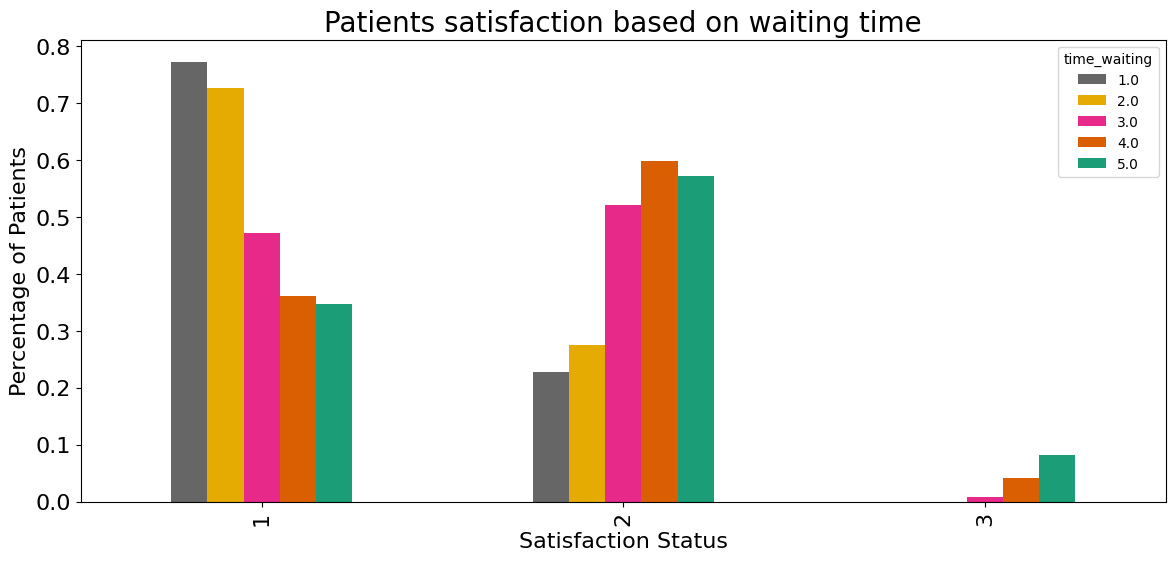

In [ ]:

waittime_tab = pd.crosstab(index=df.satisfaction_in_overall, columns=df.time_waiting)
waittime_perc = waittime_tab.apply(perc).reindex(index)

waittime_perc.plot.bar(colormap="Dark2_r", fontsize=16, figsize=(14,6))
plt.title('Patients satisfaction based on waiting time', fontsize=20)
plt.ylabel('Percentage of Patients', fontsize=16)
plt.xlabel('Satisfaction Status', fontsize=16)
plt.show()

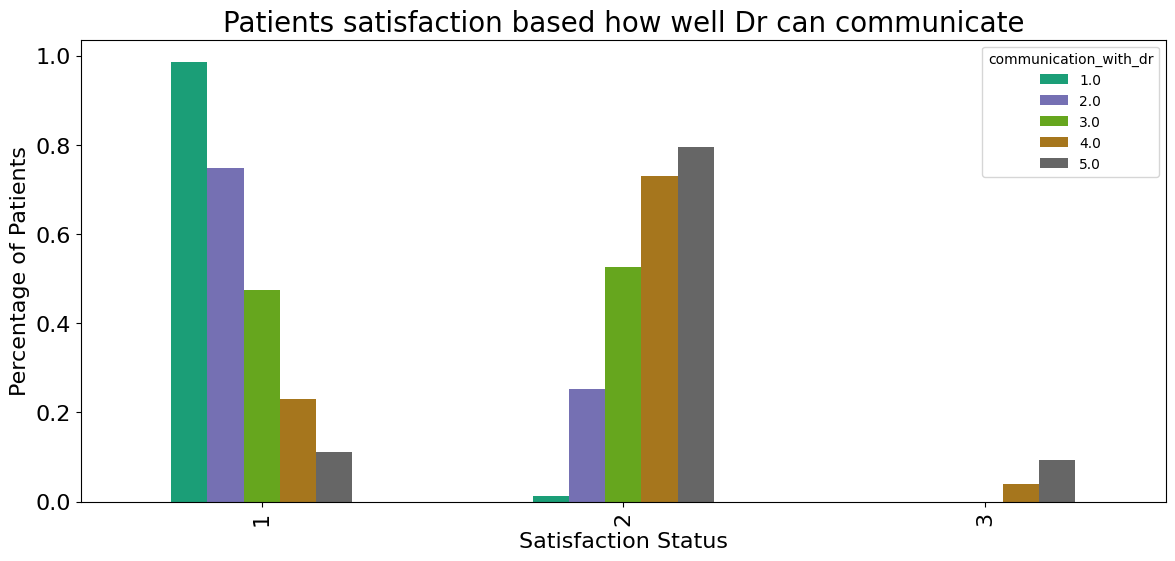

In [ ]:
com_tab = pd.crosstab(index=df.satisfaction_in_overall, columns=df.communication_with_dr)
com_perc = com_tab.apply(perc).reindex(index)

com_perc.plot.bar(colormap="Dark2", fontsize=16, figsize=(14,6))
plt.title('Patients satisfaction based how well Dr can communicate', fontsize=20)
plt.ylabel('Percentage of Patients', fontsize=16)
plt.xlabel('Satisfaction Status', fontsize=16)
plt.show()

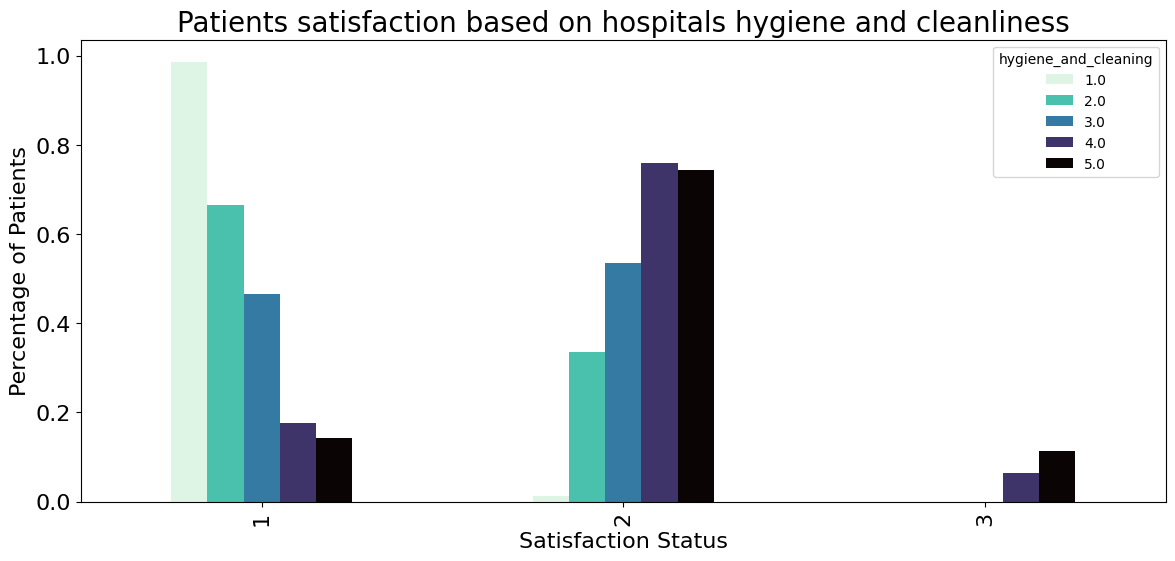

In [ ]:
hc_tab = pd.crosstab(index=df.satisfaction_in_overall, columns=df.hygiene_and_cleaning)
hc_perc = hc_tab.apply(perc).reindex(index)

hc_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Patients satisfaction based on hospitals hygiene and cleanliness', fontsize=20)
plt.ylabel('Percentage of Patients', fontsize=16)
plt.xlabel('Satisfaction Status', fontsize=16)
plt.show()

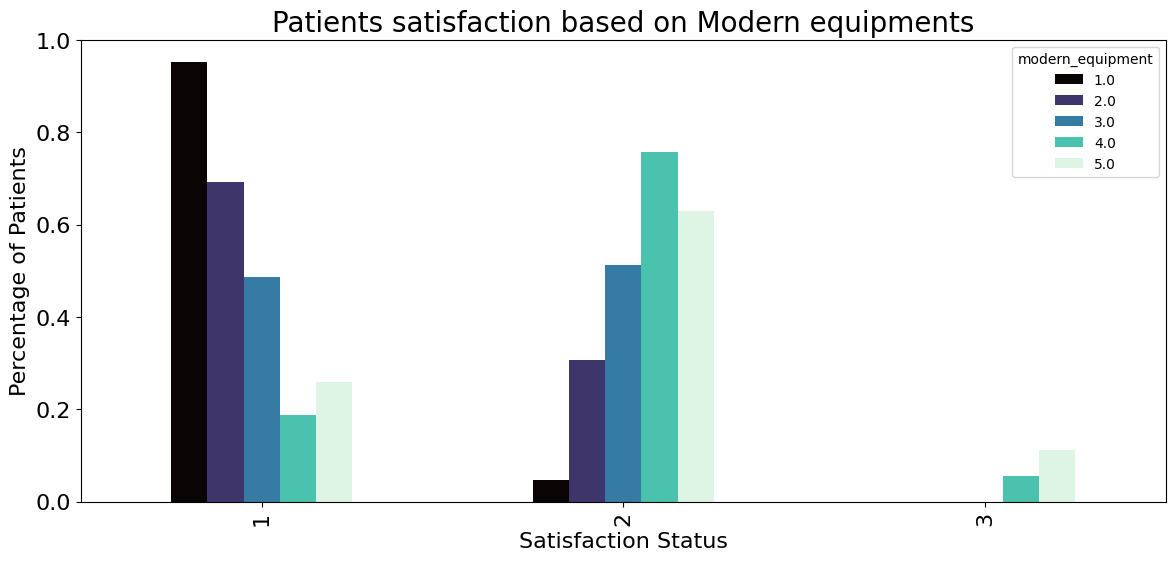

In [ ]:
me_tab = pd.crosstab(index=df.satisfaction_in_overall, columns=df.modern_equipment)
me_perc = me_tab.apply(perc).reindex(index)

me_perc.plot.bar(colormap="mako", fontsize=16, figsize=(14,6))
plt.title('Patients satisfaction based on Modern equipments', fontsize=20)
plt.ylabel('Percentage of Patients', fontsize=16)
plt.xlabel('Satisfaction Status', fontsize=16)
plt.show()

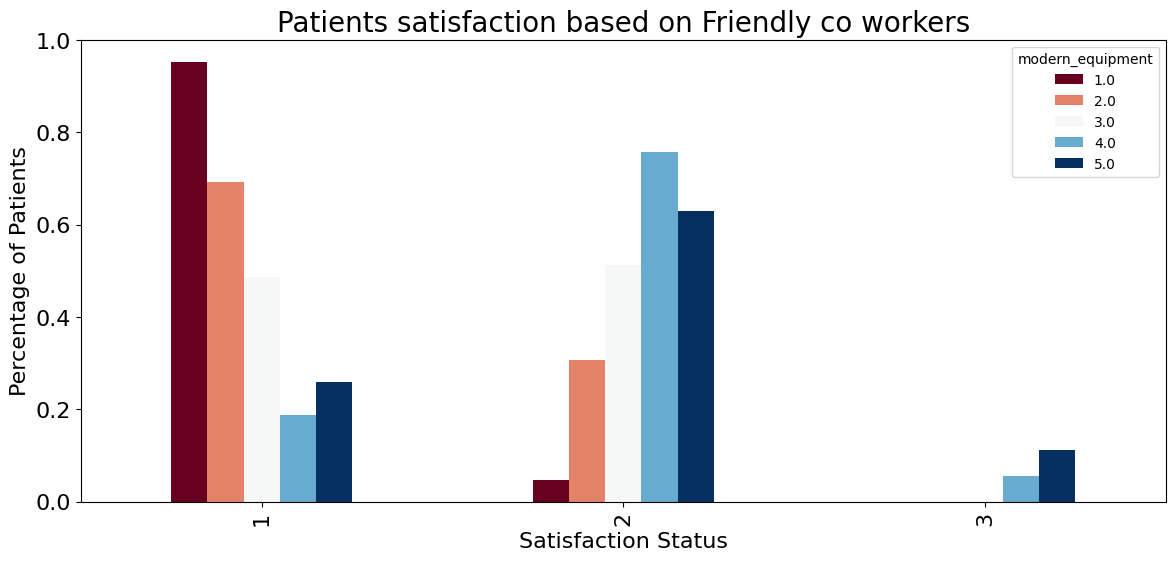

In [ ]:
fhc_tab = pd.crosstab(index=df.satisfaction_in_overall, columns=df.friendly_health_care_workers)
fhc_perc = fhc_tab.apply(perc).reindex(index)

me_perc.plot.bar(colormap="RdBu", fontsize=16, figsize=(14,6))
plt.title('Patients satisfaction based on Friendly co workers', fontsize=20)
plt.ylabel('Percentage of Patients', fontsize=16)
plt.xlabel('Satisfaction Status', fontsize=16)
plt.show()

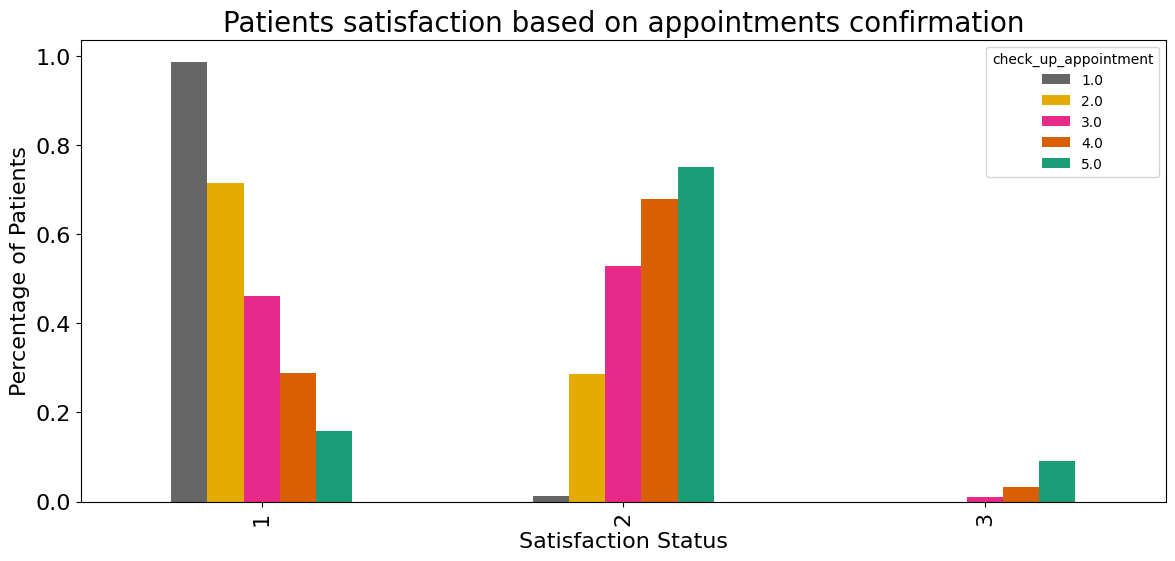

In [ ]:

checkup_tab = pd.crosstab(index=df.satisfaction_in_overall, columns=df.check_up_appointment)
checkup_perc = checkup_tab.apply(perc).reindex(index)
checkup_perc.plot.bar(colormap="Dark2_r", fontsize=16, figsize=(14,6))
plt.title('Patients satisfaction based on appointments confirmation', fontsize=20)
plt.ylabel('Percentage of Patients', fontsize=16)
plt.xlabel('Satisfaction Status', fontsize=16)
plt.show()

In [ ]:
#Assigning dependent and independent variables
x=df.drop(['satisfaction_in_overall'],axis=1)
y=df.satisfaction_in_overall

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {} ".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y == 3)))

print('Before OverSampling, the shape of X: {}'.format(x.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42, k_neighbors=5)
X_sm,y_sm=smote.fit_resample(x,y)

print('After OverSampling, the shape of X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_sm == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_sm == 3)))

Before OverSampling, counts of label '1': 241
Before OverSampling, counts of label '2': 202 
Before OverSampling, counts of label '3': 9 

Before OverSampling, the shape of X: (452, 16)
Before OverSampling, the shape of y: (452,) 

After OverSampling, the shape of X: (723, 16)
After OverSampling, the shape of y: (723,) 

After OverSampling, counts of label '1': 241
After OverSampling, counts of label '2': 241
After OverSampling, counts of label '3': 241


<Axes: xlabel='satisfaction_in_overall', ylabel='Count'>

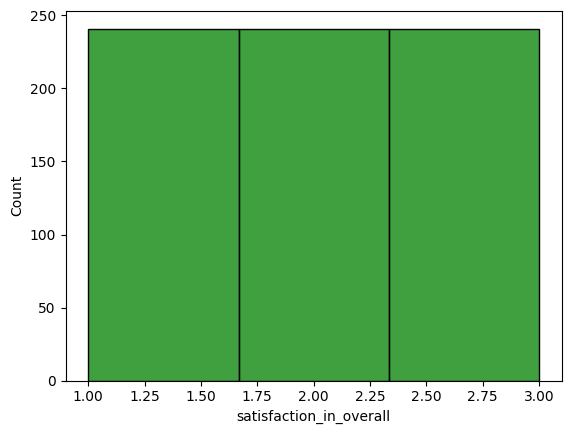

In [ ]:
#After oversampling
sns.histplot(data=df, x=y_sm,bins = 3,color="green")

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_sm,y_sm)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores)

print("\n")
print("Top 5 features \n",featureScores.nlargest(5,'Score'))  #print 5 best features
selected=featureScores.nlargest(5,'Score')['Features'].values

X_sm=X_sm[selected]
print("\n")
selected

                          Features       Score
0             check_up_appointment  161.757862
1                     time_waiting  101.865246
2                 admin_procedures   59.694743
3             hygiene_and_cleaning  193.216702
4              time_of_appointment   66.355815
5           quality/experience_dr.  100.045873
6            specialists_avaliable   89.449728
7            communication_with_dr  197.975295
8                  exact_diagnosis   80.177793
9                 modern_equipment  163.872884
10    friendly_health_care_workers  162.765443
11                    lab_services   72.212993
12            avaliablity_of_drugs   87.018352
13                   waiting_rooms   82.599283
14          hospital_rooms_quality   84.764937
15  parking,_playing_rooms,_caffes   51.169531


Top 5 features 
                         Features       Score
7          communication_with_dr  197.975295
3           hygiene_and_cleaning  193.216702
9               modern_equipment  163.872884
10

array(['communication_with_dr', 'hygiene_and_cleaning',
       'modern_equipment', 'friendly_health_care_workers',
       'check_up_appointment'], dtype=object)

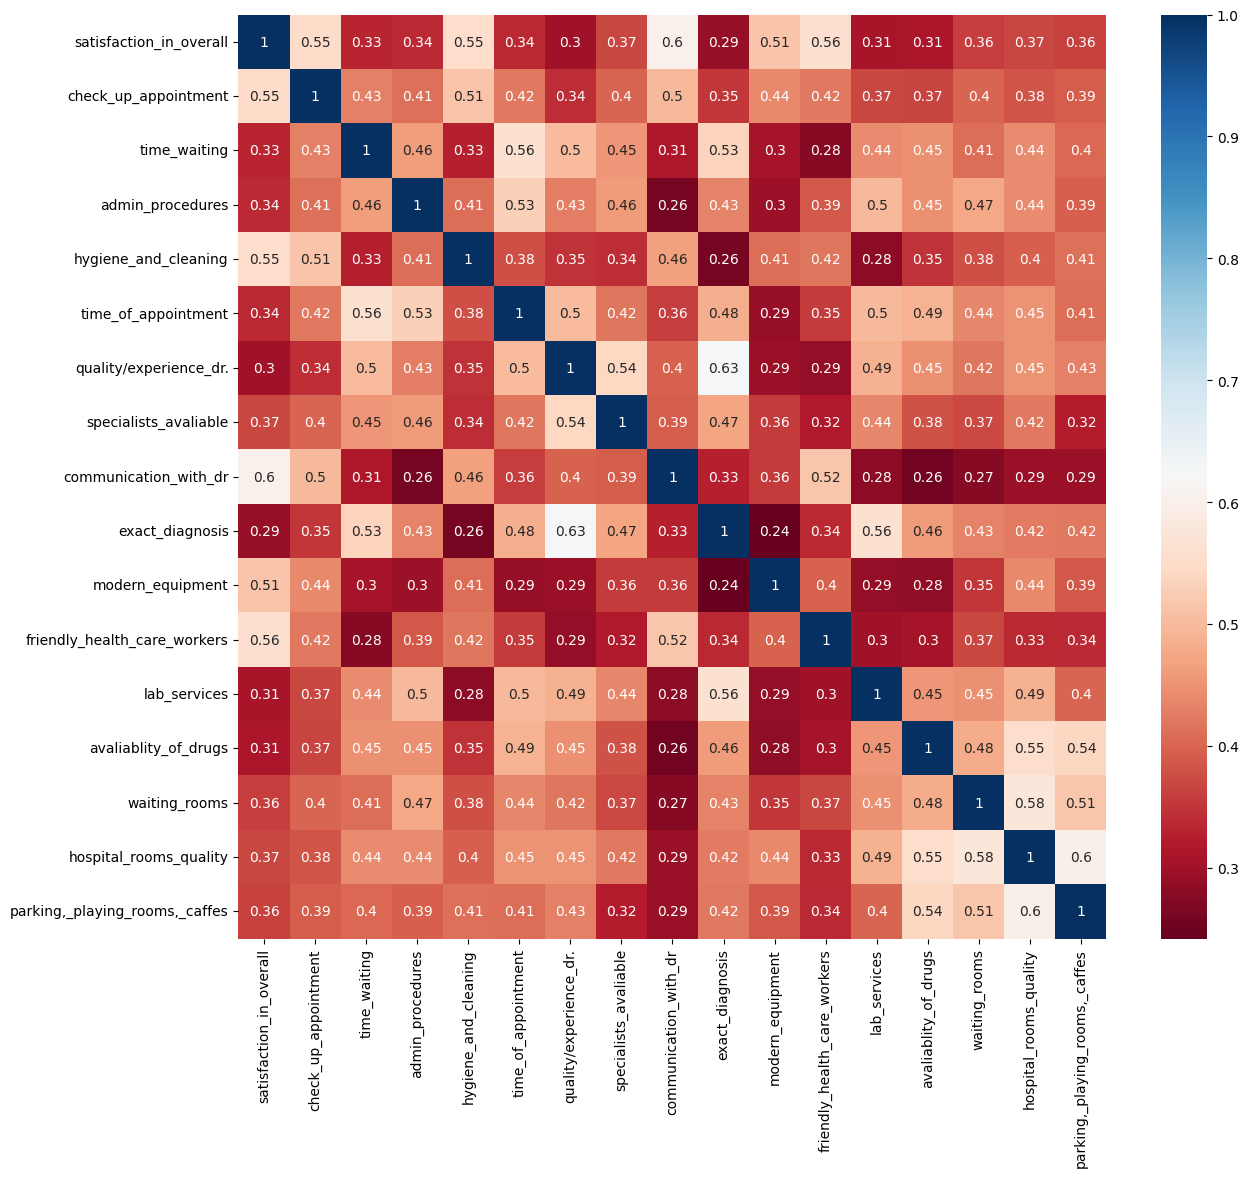

In [ ]:
corr = df.corr()
df1 = corr['satisfaction_in_overall']

plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='RdBu',annot=True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Split data train 80% and test 20%

x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
#Importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier
#training the classifier using X_Train and y_train
classifier = RandomForestClassifier(n_estimators=100,random_state=100, max_depth=7)
classifier.fit(x_train, y_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = classifier.predict(x_test)
as_rf=accuracy_score(y_test, y_pred)*100
print("Accuracy of Random Forest is",as_rf)
print("Classification error of Random Forest is",1- accuracy_score(y_test, y_pred))
print("Classification Report of Random Forest is\n",classification_report(y_test, y_pred))

Accuracy of Random Forest is 91.0344827586207
Classification error of Random Forest is 0.08965517241379306
Classification Report of Random Forest is
               precision    recall  f1-score   support

         1.0       0.93      0.88      0.91        49
         2.0       0.89      0.86      0.88        49
         3.0       0.90      1.00      0.95        47

    accuracy                           0.91       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.91      0.91      0.91       145



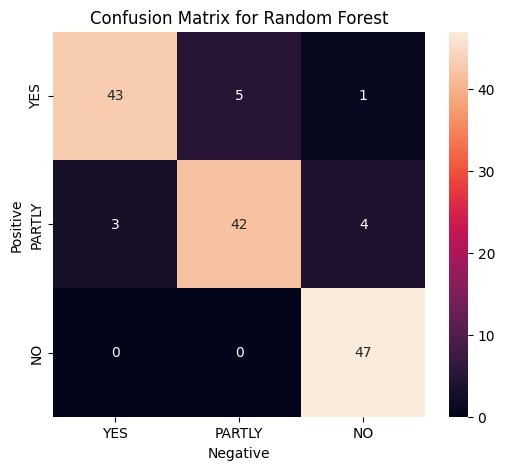

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

cm=confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_rf = pd.DataFrame(cm,
                     index = ['YES','PARTLY','NO'],
                     columns = ['YES','PARTLY','NO'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Positive')
plt.xlabel('Negative')
plt.show()

In [ ]:
#Importing xgboost

from xgboost import XGBClassifier
#training the classifier using X_Train and y_train
classifier=XGBClassifier( booster='gbtree',objective='multi:softprob',gamma=0.3,learning_rate=0.25,tree_method='exact',verbosity=1)
classifier.fit(x_train,y_train)
#Testing the model using X_test and storing the output in y_pred

y_pred=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
as_xgb=accuracy_score(y_test, y_pred)*100

print("Accuracy of XGBoost is ",as_xgb)
print("Classification error of XGBoost is",1- accuracy_score(y_test, y_pred))

print("Classification Report of XGBoost \n",classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost is  89.65517241379311
Classification error of XGBoost is 0.10344827586206895
Classification Report of XGBoost 
               precision    recall  f1-score   support

         1.0       0.91      0.88      0.90        49
         2.0       0.83      0.88      0.85        49
         3.0       0.96      0.94      0.95        47

    accuracy                           0.90       145
   macro avg       0.90      0.90      0.90       145
weighted avg       0.90      0.90      0.90       145



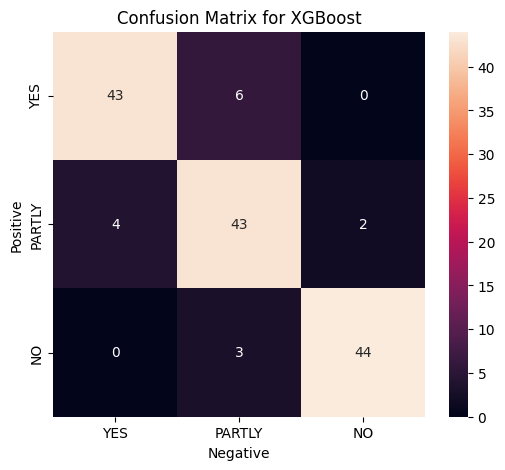

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_xgb = pd.DataFrame(cm,
                     index = ['YES','PARTLY','NO'],
                     columns = ['YES','PARTLY','NO'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True)
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Positive')
plt.xlabel('Negative')
plt.show()

In [ ]:
#Importing SVM
from sklearn.svm import SVC
#training the classifier using X_Train and y_train
rbf = SVC(decision_function_shape='ovr',kernel='rbf', gamma="auto", C=0.1,max_iter=40)
rbf.fit(x_train, y_train)
#Testing the model using X_test and storing the output in y_pred

y_pred = rbf.predict(x_test)
as_svm=accuracy_score(y_test, y_pred)*100

print("Accuracy of SVM is",as_svm)
print("Classification error of SVM  is",1- accuracy_score(y_test, y_pred))

print("Classification Report of SVM  \n",classification_report(y_test, y_pred))



Accuracy of SVM is 88.27586206896552
Classification error of SVM  is 0.11724137931034484
Classification Report of SVM  
               precision    recall  f1-score   support

         1.0       0.93      0.82      0.87        49
         2.0       0.84      0.84      0.84        49
         3.0       0.89      1.00      0.94        47

    accuracy                           0.88       145
   macro avg       0.88      0.88      0.88       145
weighted avg       0.88      0.88      0.88       145



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


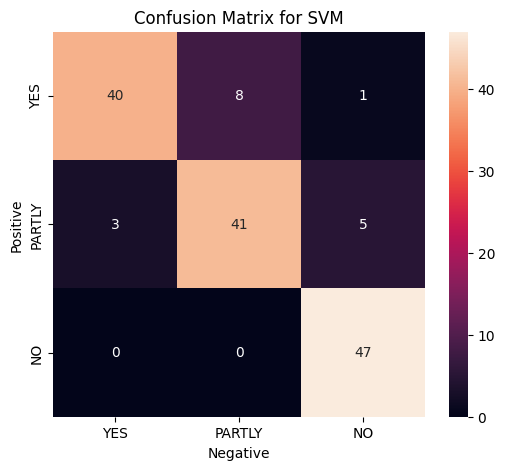

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_svm = pd.DataFrame(cm,
                     index = ['YES','PARTLY','NO'],
                     columns = ['YES','PARTLY','NO'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True)
plt.title('Confusion Matrix for SVM')
plt.ylabel('Positive')
plt.xlabel('Negative')
plt.show()

In [ ]:
#Importing KNN library
from sklearn.neighbors import KNeighborsClassifier
#training the classifier using X_Train and y_train
neigh = KNeighborsClassifier(n_neighbors=2,algorithm="kd_tree")
neigh.fit(x_train, y_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = neigh.predict(x_test)
as_knn=accuracy_score(y_test, y_pred)*100
print("Accuracy of KNN is",as_knn)
print("Classification error of KNN is",1- accuracy_score(y_test, y_pred))
print("Classification Report of KNN\n",classification_report(y_test, y_pred))


Accuracy of KNN is 84.82758620689656
Classification error of KNN is 0.15172413793103445
Classification Report of KNN
               precision    recall  f1-score   support

         1.0       0.77      0.90      0.83        49
         2.0       0.89      0.65      0.75        49
         3.0       0.90      1.00      0.95        47

    accuracy                           0.85       145
   macro avg       0.85      0.85      0.84       145
weighted avg       0.85      0.85      0.84       145



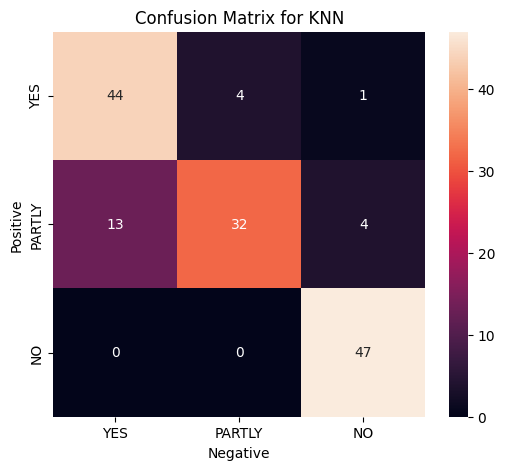

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred

cm=confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_knn = pd.DataFrame(cm,
                     index = ['YES','PARTLY','NO'],
                     columns = ['YES','PARTLY','NO'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True)
plt.title('Confusion Matrix for KNN')
plt.ylabel('Positive')
plt.xlabel('Negative')
plt.show()

In [ ]:
priority=featureScores.nlargest(16,'Score')['Features'].values
print("All attributes based on weightage needs to be focused for the hospital to satisfy patients \n")
priority_list = list(priority)
count=1
for i in priority_list:
  print("Priority ",count," is ",i)
  count=count+1

All attributes based on weightage needs to be focused for the hospital to satisfy patients 

Priority  1  is  communication_with_dr
Priority  2  is  hygiene_and_cleaning
Priority  3  is  modern_equipment
Priority  4  is  friendly_health_care_workers
Priority  5  is  check_up_appointment
Priority  6  is  time_waiting
Priority  7  is  quality/experience_dr.
Priority  8  is  specialists_avaliable
Priority  9  is  avaliablity_of_drugs
Priority  10  is  hospital_rooms_quality
Priority  11  is  waiting_rooms
Priority  12  is  exact_diagnosis
Priority  13  is  lab_services
Priority  14  is  time_of_appointment
Priority  15  is  admin_procedures
Priority  16  is  parking,_playing_rooms,_caffes


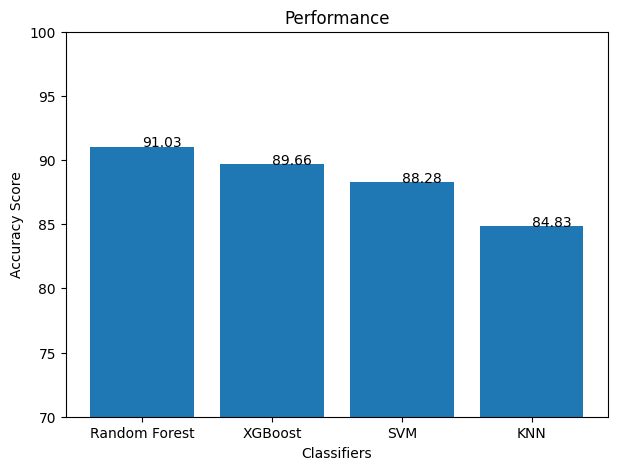

In [ ]:
#Comparison of all 4 algorithms
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
x=['Random Forest','XGBoost','SVM','KNN']
y = [round(as_rf, 2) , round(as_xgb,  2) , round(as_svm, 2) , round(as_knn,2)]
plt.bar(x,y)
addlabels(x, y)
plt.ylim(70,100)
plt.xlabel('Classifiers')
plt.ylabel("Accuracy Score")
plt.title('Performance')
plt.show()